Simple Auto Encoder

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
# from IPython.display import SVG

### loading data ###
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape((-1, 28*28)) / 255.0
x_test = x_test.reshape((-1, 28*28)) / 255.0


### build model ###
code_dim = 32
auto_encoder = keras.Sequential(
[
    layers.Dense(code_dim, input_shape = (x_train.shape[1],), activation = 'relu', name = 'encode'),
    layers.Dense(x_train.shape[1], activation = 'softmax', name = 'output')
])

encoder_input = layers.Input(shape = (x_train.shape[1],))
encoder_output = auto_encoder.get_layer('encode')(encoder_input)
encoder = keras.Model(encoder_input, encoder_output)

decoder_input = keras.Input((code_dim,))
decoder_output = auto_encoder.get_layer('output')(decoder_input)
decoder = keras.Model(decoder_input, decoder_output)

auto_encoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

history = auto_encoder.fit(x_train, x_train, batch_size = 256, epochs = 5, validation_split = 0.1)

encoded = encoder.predict(x_test)
decoded = decoder.predict(encoded)

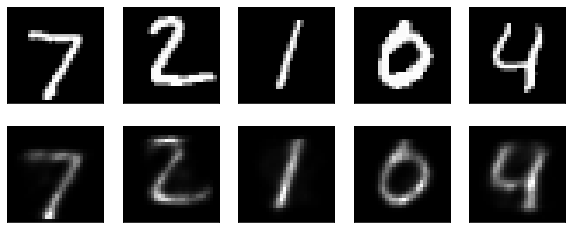

In [5]:
### plot orignal data and decoded data ###
plt.figure(figsize=(10,4))

n = 5
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
#     plt.imshow(tf.reshape(x_test[i],(28,28)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, n+i+1)
    plt.imshow(decoded[i].reshape(28,28))
#     plt.imshow(tf.reshape(decoded[i],(28,28)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Auto Encoder with CNN

In [0]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers